In [1]:
import pandas as pd
import re
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [2]:
#Load the CSV files into DataFrames
df1 = pd.read_csv(r"C:\Users\gonth\Downloads\ResaleFlatPricesBasedonApprovalDate19901999.csv")
df2 = pd.read_csv(r"C:\Users\gonth\Downloads\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df3 = pd.read_csv(r"C:\Users\gonth\Downloads\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df4 = pd.read_csv(r"C:\Users\gonth\Downloads\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df5 = pd.read_csv(r"C:\Users\gonth\Downloads\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
     

In [3]:
data = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

In [4]:
data.sample(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
1867,1990-02,CLEMENTI,3 ROOM,432,CLEMENTI AVE 3,10 TO 12,67.0,NEW GENERATION,1978,50000.0,NaN
192587,1998-05,BEDOK,3 ROOM,534,BEDOK NTH ST 3,10 TO 12,69.0,IMPROVED,1986,160000.0,NaN
782828,2018-09,WOODLANDS,5 ROOM,857,WOODLANDS ST 83,01 TO 03,126.0,Improved,1996,385000.0,76 years 06 months
874816,2022-06,JURONG WEST,4 ROOM,660A,JURONG WEST ST 64,13 TO 15,91.0,Model A,2001,500000.0,78 years 03 months
856147,2021-06,SERANGOON,5 ROOM,242,SERANGOON AVE 3,07 TO 09,121.0,Improved,1986,763000.0,64 years
716708,2015-06,HOUGANG,5 ROOM,950,HOUGANG ST 91,10 TO 12,121.0,Improved,1999,518000.0,82
743468,2016-11,BUKIT BATOK,3 ROOM,161,BT BATOK ST 11,04 TO 06,73.0,Model A,1984,310000.0,66
861457,2021-03,YISHUN,4 ROOM,873,YISHUN ST 81,01 TO 03,104.0,Model A,1988,390000.0,66 years 02 months
58689,1994-01,BUKIT BATOK,4 ROOM,316,BT BATOK ST 32,10 TO 12,98.0,NEW GENERATION,1986,155000.0,NaN
681856,2013-04,SENGKANG,5 ROOM,323A,SENGKANG EAST WAY,04 TO 06,110.0,Improved,2003,570000.0,NaN


In [5]:
data.shape

(917428, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917428 entries, 0 to 917427
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                917428 non-null  object 
 1   town                 917428 non-null  object 
 2   flat_type            917428 non-null  object 
 3   block                917428 non-null  object 
 4   street_name          917428 non-null  object 
 5   storey_range         917428 non-null  object 
 6   floor_area_sqm       917428 non-null  float64
 7   flat_model           917428 non-null  object 
 8   lease_commence_date  917428 non-null  int64  
 9   resale_price         917428 non-null  float64
 10  remaining_lease      208378 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 77.0+ MB


In [7]:
data.isna().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [8]:
data.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,917428.000000,917428.000000,9.174280e+05
mean,95.696470,1988.170636,3.178516e+05
std,25.844098,10.554219,1.679398e+05
min,28.000000,1966.000000,5.000000e+03
25%,73.000000,1981.000000,1.920000e+05
50%,93.000000,1986.000000,2.950000e+05
75%,113.000000,1996.000000,4.140000e+05
max,307.000000,2022.000000,1.568888e+06


In [9]:
data.skew(numeric_only= True)

floor_area_sqm         0.367175
lease_commence_date    0.633162
resale_price           0.928171
dtype: float64

In [10]:

data['month'] = pd.to_datetime(data['month'])

# Extract the year and month into separate columns
data['year'] = data['month'].dt.year
data['month'] = data['month'].dt.month
     


In [11]:
# Calculate the remaining lease
data['remaining_lease'] = data['lease_commence_date'] + 99 - data['year']

In [12]:
data['flat_type'] = data['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')

In [13]:
data['flat_type'].value_counts()

flat_type
4 ROOM              348213
3 ROOM              293553
5 ROOM              193202
EXECUTIVE            69064
2 ROOM               11557
1 ROOM                1300
MULTI GENERATION       539
Name: count, dtype: int64

In [14]:
data['flat_model'] = data['flat_model'].str.lower()
data['flat_model'] = data['flat_model'].str.title()
     

In [15]:
data.sample(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
869478,4,ANG MO KIO,2 ROOM,170,ANG MO KIO AVE 4,04 TO 06,45.0,Improved,1986,265000.0,63,2022
267839,7,YISHUN,3 ROOM,808,YISHUN RING RD,04 TO 06,74.0,Model A,1987,169000.0,87,1999
230218,1,BISHAN,4 ROOM,154,BISHAN ST 13,01 TO 03,84.0,Simplified,1987,233000.0,87,1999
533062,10,HOUGANG,4 ROOM,547,HOUGANG ST 51,01 TO 03,106.0,Model A,1992,280000.0,84,2007
303286,6,YISHUN,4 ROOM,153,YISHUN ST 11,10 TO 12,96.0,New Generation,1986,239500.0,85,2000
306218,7,YISHUN,3 ROOM,753,YISHUN ST 72,01 TO 03,69.0,Simplified,1986,119000.0,85,2000
858310,11,TAMPINES,4 ROOM,251,TAMPINES ST 21,07 TO 09,102.0,Model A,1985,530000.0,63,2021
627181,11,ANG MO KIO,3 ROOM,549,ANG MO KIO AVE 10,13 TO 15,68.0,New Generation,1981,320000.0,70,2010
897323,4,MARINE PARADE,3 ROOM,47,MARINE CRES,07 TO 09,65.0,Improved,1975,400000.0,51,2023
130003,7,HOUGANG,EXECUTIVE,562,HOUGANG ST 51,01 TO 03,144.0,Apartment,1992,577000.0,95,1996


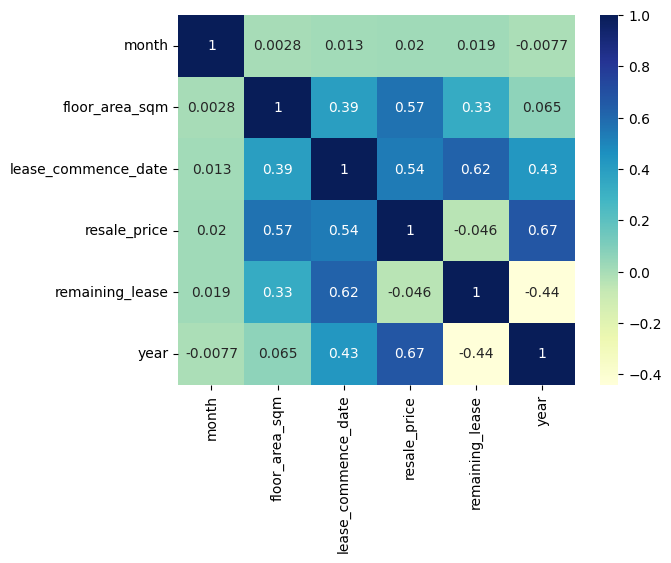

In [16]:
sns.heatmap(data.corr(numeric_only=True),cmap="YlGnBu", annot=True)
plt.show()

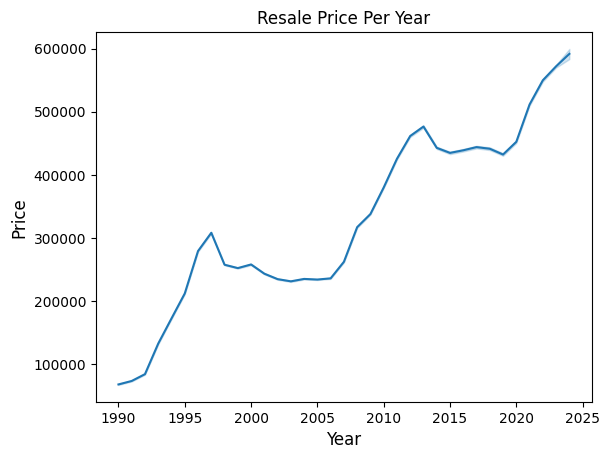

In [17]:
sns.lineplot(data = data, x ='year', y = 'resale_price')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Price',fontsize = 12)
plt.title("Resale Price Per Year")
plt.show()

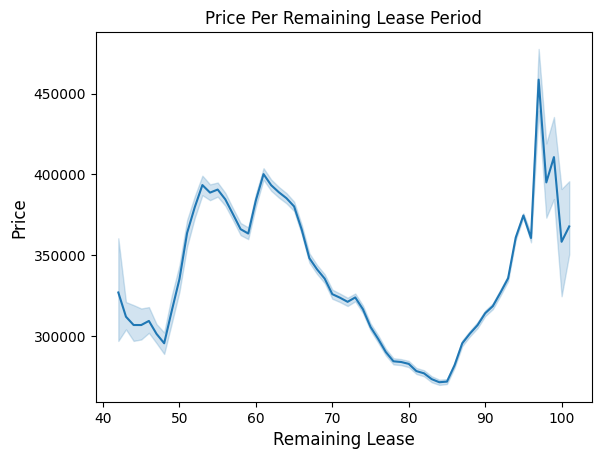

In [18]:
sns.lineplot(data = data, x ='remaining_lease', y = 'resale_price')
plt.xlabel('Remaining Lease', fontsize = 12)
plt.ylabel('Price',fontsize = 12)
plt.title("Price Per Remaining Lease Period")
plt.show()

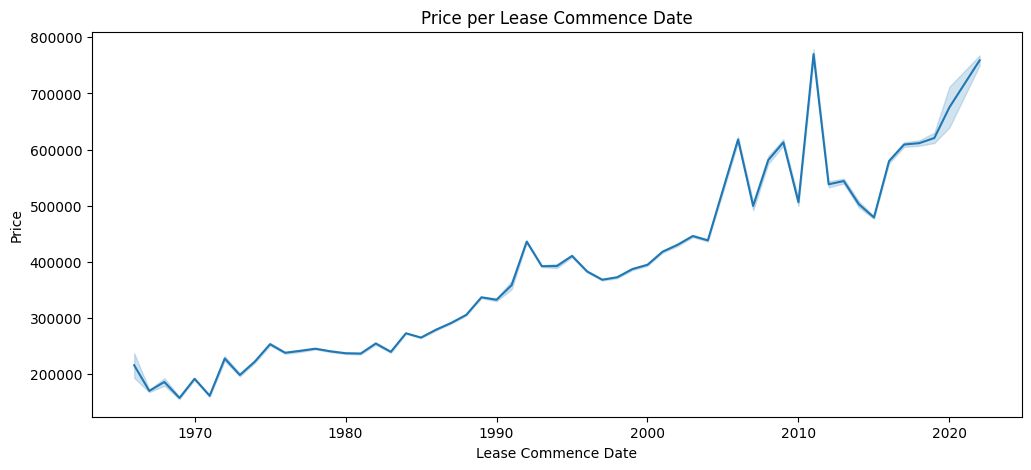

In [18]:
plt.figure(figsize=(12,5))
sns.lineplot(x='lease_commence_date', y='resale_price', data=data)
plt.xlabel('Lease Commence Date')
plt.ylabel('Price')
plt.title('Price per Lease Commence Date')
plt.show()

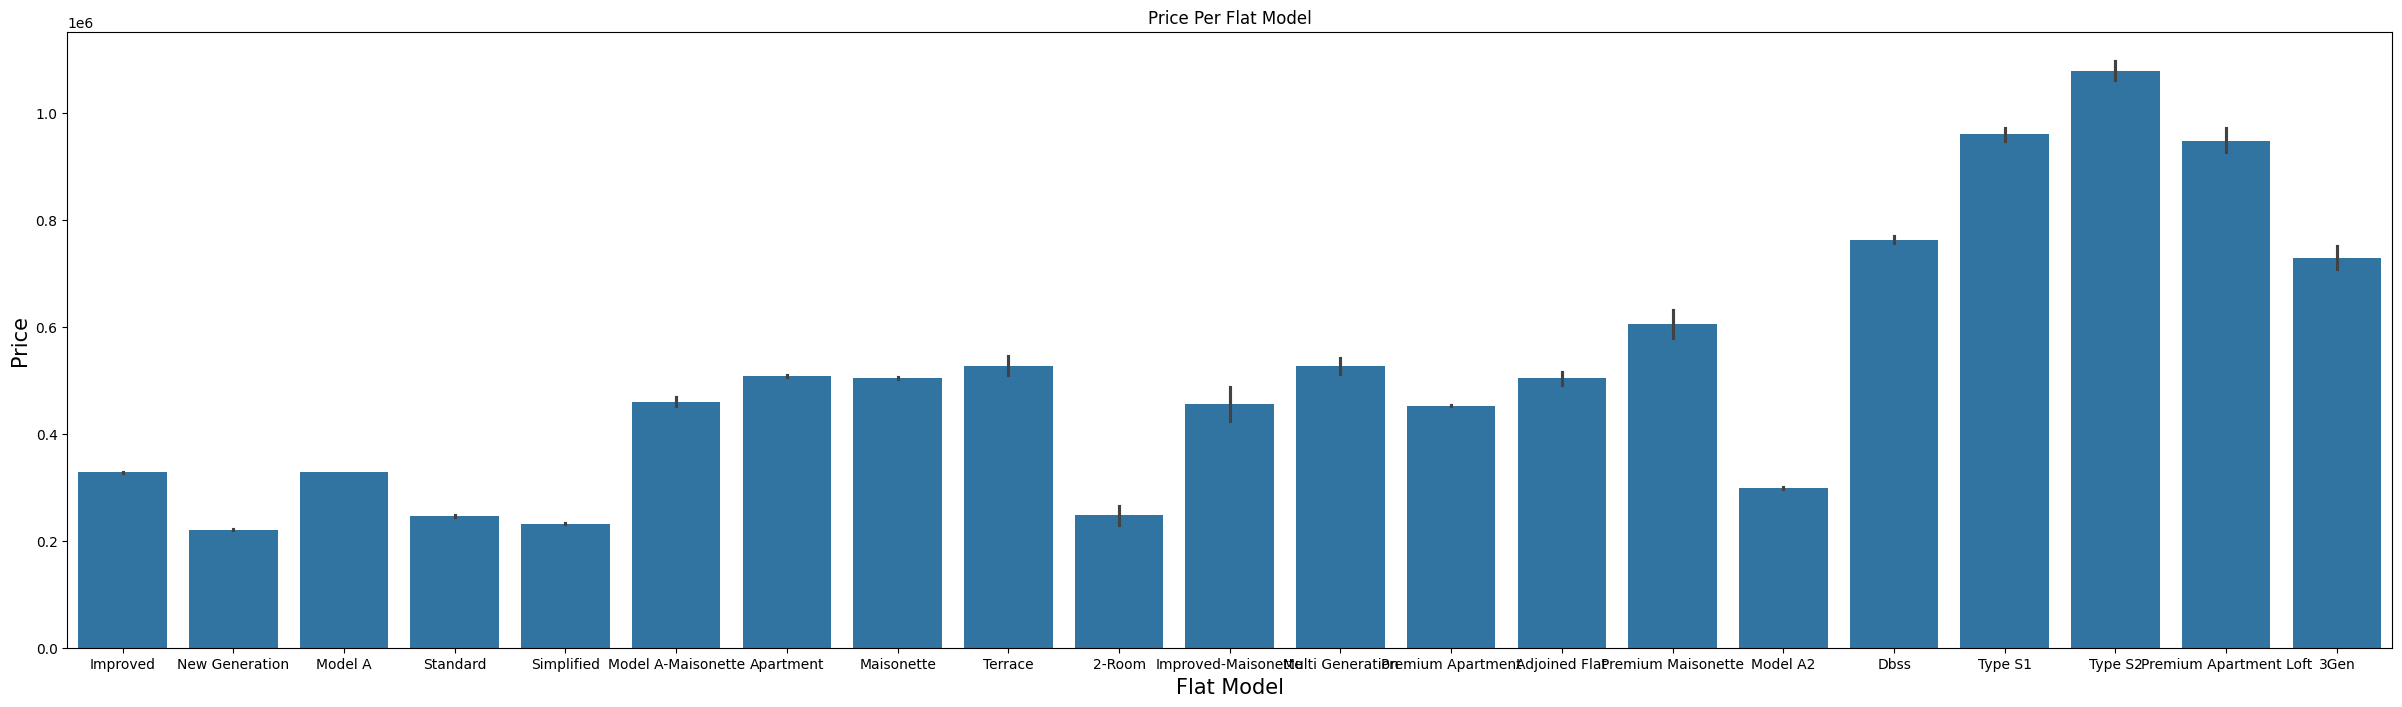

In [21]:
plt.figure(figsize=(30,8))
sns.barplot(x='flat_model',y = 'resale_price', data=data)
plt.xlabel('Flat Model', fontsize = 15)
plt.ylabel('Price',fontsize = 15)
plt.title("Price Per Flat Model")
plt.show()
     


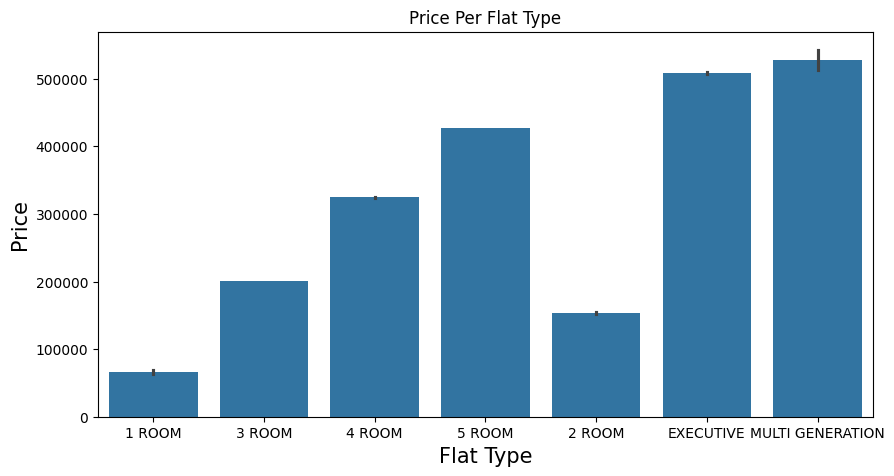

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(data = data, x ='flat_type',y = 'resale_price')
plt.xlabel('Flat Type', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.title('Price Per Flat Type')
plt.show()

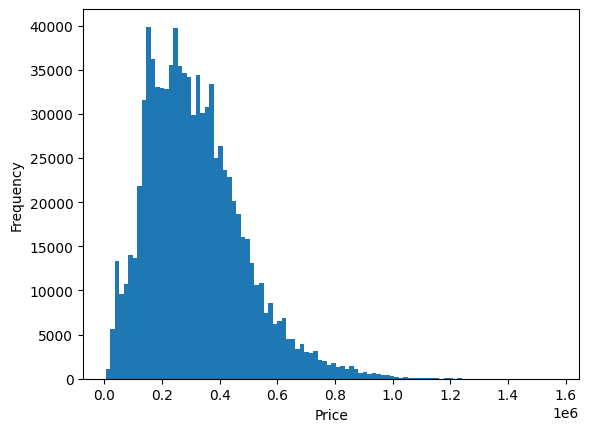

In [19]:
plt.hist(data['resale_price'], bins=100)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [17]:
# Calculate the average of the upper and lower bounds and create a new column 'storey_range_avg'
data['storey_range_avg'] = data['storey_range'].apply(lambda x: (int(x.split(' TO ')[0]) + int(x.split(' TO ')[1])) / 2)

# Drop the original 'storey_range' column
data.drop(columns=['storey_range'], inplace=True)

# Rename the 'storey_range_avg' column to 'storey_range'
data.rename(columns={'storey_range_avg': 'storey_range'}, inplace=True)

In [18]:
# Create a mapping from flat_type to integer values
flat_type_mapping = {
    '1 ROOM': 1,
    '2 ROOM': 2,
    '3 ROOM': 3,
    '4 ROOM': 4,
    '5 ROOM': 5,
    'EXECUTIVE': 6,
    'MULTI GENERATION' : 7
}

# Apply the mapping to the 'flat_type' column
data['flat_type_encoded'] = data['flat_type'].map(flat_type_mapping)

# You can drop the original 'flat_type' column if needed
data.drop(columns=['flat_type'], inplace=True)

# If you want to rename the new column to 'flat_type', you can do so
data.rename(columns={'flat_type_encoded': 'flat_type'}, inplace=True)
     

In [19]:
data.drop(['street_name','block'],axis=1, inplace = True)

In [20]:
data2 = pd.get_dummies(data, columns=['town', 'flat_model'])

In [21]:
# Define features (X) and target (y)
X = data2.drop("resale_price", axis=1)
y = data2["resale_price"]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
     

In [22]:
X

,month,floor_area_sqm,lease_commence_date,remaining_lease,year,storey_range,flat_type,town_ANG MO KIO,town_BEDOK,town_BISHAN,...,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2
0,1,31.0,1977,86,1990,11.0,1,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,31.0,1977,86,1990,5.0,1,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,31.0,1977,86,1990,11.0,1,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,31.0,1977,86,1990,8.0,1,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,73.0,1976,85,1990,5.0,3,True,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917423,1,146.0,1988,63,2024,2.0,6,False,False,False,...,False,False,False,False,False,False,False,False,False,False
917424,1,146.0,1988,63,2024,5.0,6,False,False,False,...,False,False,False,False,False,False,False,False,False,False
917425,1,146.0,1988,63,2024,5.0,6,False,False,False,...,False,False,False,False,False,False,False,False,False,False
917426,1,146.0,1988,63,2024,5.0,6,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
linear_reg_pred = linear_reg_model.predict(X_val)

# Calculate regression metrics for each model
linear_reg_mae = mean_absolute_error(y_val, linear_reg_pred)
linear_reg_mse = mean_squared_error(y_val, linear_reg_pred)
linear_reg_rmse = np.sqrt(linear_reg_mse)
linear_reg_r2 = r2_score(y_val, linear_reg_pred)

# Display the results for all three models
print("Linear Regression Results:")
print(f"Mean Absolute Error: {linear_reg_mae}")
print(f"Mean Squared Error: {linear_reg_mse}")
print(f"Root Mean Squared Error: {linear_reg_rmse}")
print(f"R2 Score: {linear_reg_r2}")
print()

Linear Regression Results:
Mean Absolute Error: 52364.86831850931
Mean Squared Error: 4636284225.742416
Root Mean Squared Error: 68090.26527883715
R2 Score: 0.8357626549428876



In [27]:
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)
decision_tree_pred = decision_tree_model.predict(X_val)

decision_tree_mae = mean_absolute_error(y_val, decision_tree_pred)
decision_tree_mse = mean_squared_error(y_val, decision_tree_pred)
decision_tree_rmse = np.sqrt(decision_tree_mse)
decision_tree_r2 = r2_score(y_val, decision_tree_pred)

print("Decision Tree Results:")
print(f"Mean Absolute Error: {decision_tree_mae}")
print(f"Mean Squared Error: {decision_tree_mse}")
print(f"Root Mean Squared Error: {decision_tree_rmse}")
print(f"R2 Score: {decision_tree_r2}")
print()


Decision Tree Results:
Mean Absolute Error: 20995.23954559851
Mean Squared Error: 1016987751.8784224
Root Mean Squared Error: 31890.245403232984
R2 Score: 0.9639738721373651



In [ ]:
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)
random_forest_pred = random_forest_model.predict(X_val)

random_forest_mae = mean_absolute_error(y_val, random_forest_pred)
random_forest_mse = mean_squared_error(y_val, random_forest_pred)
random_forest_rmse = np.sqrt(random_forest_mse)
random_forest_r2 = r2_score(y_val, random_forest_pred)

print("Random Forest Results:")
print(f"Mean Absolute Error: {random_forest_mae}")
print(f"Mean Squared Error: {random_forest_mse}")

print(f"Root Mean Squared Error: {random_forest_rmse}")
print(f"R2 Score: {random_forest_r2}")

In [29]:
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)
random_forest_pred = random_forest_model.predict(X_val)

random_forest_mae = mean_absolute_error(y_val, random_forest_pred)
print(f"Mean Absolute Error: {random_forest_mae}")


Mean Absolute Error: 16609.38618231648


In [ ]:
# Create and train the Random Forest model using your training data
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)

In [ ]:
import pickle
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(random_forest_model, file)
     

In [ ]:
# Define a function to take user input
def get_user_input():
    user_input = {}

    user_input['month'] = int(input("Enter the month: "))
    user_input['floor_area_sqm'] = float(input("Enter the floor area in square meters: "))
    user_input['lease_commence_date'] = int(input("Enter the lease commencement year: "))
    user_input['remaining_lease'] = None
    user_input['year'] = int(input("Enter the year: "))
    user_input['remaining_lease'] = user_input['lease_commence_date'] + 99 - user_input['year']

    # Calculate remaining lease based on user input
    #user_input['remaining_lease'] = user_input['lease_commence_date'] + 99 - user_input['year']

    user_input['storey_range'] = float(input("Enter the storey range: "))
    user_input['flat_type'] = int(input("Enter the flat type (e.g., 1, 2, 3, etc.): "))

    town = input("Enter the town (e.g., 'BEDOK', 'TAMPINES', etc.): ")
    flat_model = input("Enter the flat model (e.g., 'Improved', 'New Generation', etc.): ")

    # Set all other 'town' columns to 0
    all_town_columns = [
        'town_ANG MO KIO', 'town_BEDOK', 'town_BISHAN', 'town_BUKIT BATOK', 'town_BUKIT MERAH',
        'town_BUKIT PANJANG', 'town_BUKIT TIMAH', 'town_CENTRAL AREA', 'town_CHOA CHU KANG',
        'town_CLEMENTI', 'town_GEYLANG', 'town_HOUGANG', 'town_JURONG EAST', 'town_JURONG WEST',
        'town_KALLANG/WHAMPOA', 'town_LIM CHU KANG', 'town_MARINE PARADE', 'town_PASIR RIS',
        'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG', 'town_SENGKANG', 'town_SERANGOON',
        'town_TAMPINES', 'town_TOA PAYOH', 'town_WOODLANDS', 'town_YISHUN'
    ]

    for town_column in all_town_columns:
        if town_column != f'town_{town}':
            user_input[town_column] = 0
        else:
            user_input[f'town_{town}'] = 1

    # Set all other 'flat_model' columns to 0
    all_flat_model_columns = [
        'flat_model_2-Room', 'flat_model_3Gen', 'flat_model_Adjoined Flat', 'flat_model_Apartment',
        'flat_model_Dbss', 'flat_model_Improved', 'flat_model_Improved-Maisonette',
        'flat_model_Maisonette', 'flat_model_Model A', 'flat_model_Model A-Maisonette',
        'flat_model_Model A2', 'flat_model_Multi Generation', 'flat_model_New Generation',
        'flat_model_Premium Apartment', 'flat_model_Premium Apartment Loft',
        'flat_model_Premium Maisonette', 'flat_model_Simplified', 'flat_model_Standard',
        'flat_model_Terrace', 'flat_model_Type S1', 'flat_model_Type S2'
    ]

    for flat_model_column in all_flat_model_columns:
        if flat_model_column != f'flat_model_{flat_model}':
            user_input[flat_model_column] = 0
        else:
            user_input[f'flat_model_{flat_model}'] = 1

    return user_input
    

In [ ]:
# Get user input
user_input_data = get_user_input()

# Create a DataFrame from the user input
user_input_df = pd.DataFrame([user_input_data])

# Use the model to make predictions
predicted_prices = random_forest_model.predict(user_input_df)

# Print the predicted resale price
print("Predicted Resale Price:", predicted_prices[0])
 

In [ ]:
%%writefile app.py

import pickle
import pandas as pd
import numpy as np
import streamlit as st

def load_model(model_file):
    with open(model_file, 'rb') as file:
        loaded_model = pickle.load(file)
    return loaded_model

def convert_storey_range(storey_range):
    return (int(storey_range.split(' TO ')[0]) + int(storey_range.split(' TO ')[1])) / 2

flat_type_mapping = {'1 ROOM': 1,'2 ROOM': 2,'3 ROOM': 3,'4 ROOM': 4,'5 ROOM': 5,'EXECUTIVE': 6,'MULTI GENERATION': 7}

month_mapping = {
  'January': 1,'February': 2,'March': 3,'April': 4,'May': 5,'June': 6,'July': 7,'August': 8,'September': 9,'October': 10,'November': 11,'December': 12
}

storey = ['01 TO 03', '01 TO 05', '04 TO 06', '06 TO 10', '07 TO 09',
          '10 TO 12', '11 TO 15', '13 TO 15', '16 TO 18', '16 TO 20',
          '19 TO 21', '21 TO 25', '22 TO 24', '25 TO 27', '26 TO 30',
          '28 TO 30', '31 TO 33', '31 TO 35', '34 TO 36', '36 TO 40',
          '37 TO 39', '40 TO 42', '43 TO 45', '46 TO 48', '49 TO 51']


all_towns = ['ANG MO KIO','BEDOK','BISHAN','BUKIT BATOK','BUKIT MERAH',
            'BUKIT PANJANG','BUKIT TIMAH','CENTRAL AREA','CHOA CHU KANG',
            'CLEMENTI','GEYLANG','HOUGANG','JURONG EAST','JURONG WEST',
            'KALLANG/WHAMPOA','LIM CHU KANG','MARINE PARADE','PASIR RIS','PUNGGOL',
            'QUEENSTOWN','SEMBAWANG','SENGKANG','SERANGOON','TAMPINES',
            'TOA PAYOH','WOODLANDS','YISHUN']


all_flat_model = ['2-Room','3Gen','Adjoined Flat','Apartment','Dbss',
                  'Improved','Improved-Maisonette','Maisonette','Model A','Model A-Maisonette',
                  'Model A2','Multi Generation','New Generation','Premium Apartment','Premium Apartment Loft',
                  'Premium Maisonette','Simplified','Standard','Terrace','Type S1','Type S2']

def get_user_input():
    user_input = {}

    st.write("#### Enter the Details:")

    # Display "Month" as a dropdown with month names
    month = st.selectbox("Month", list(month_mapping.keys()))
    user_input['month'] = month_mapping[month]
    year = st.number_input("Year (YYYY)", min_value=1990, max_value=2023)

    user_input['floor_area_sqm'] = st.number_input("Floor Area (sqm)")
    user_input['lease_commence_date'] = st.number_input("Lease Commencement Year (YYYY)", min_value=1966, max_value=2023)

    user_input['remaining_lease'] = None
    user_input['year'] = year

    user_input['remaining_lease'] = user_input['lease_commence_date'] + 99 - user_input['year']

    # Display "storey_range" as a select box with input as "01 TO 03"
    storey_range = st.selectbox("Storey Range", storey)

    # Convert storey range to the average of the range
    user_input['storey_range'] = convert_storey_range(storey_range)

    # Display "flat_type" as a dropdown with user-friendly names
    flat_type = st.selectbox("Flat Type", list(flat_type_mapping.keys()))
    user_input['flat_type'] = flat_type_mapping[flat_type]

    town = st.selectbox("Town", all_towns)
    all_town_columns = []
    for i in all_towns:
        all_town_columns.append(f'town_{i}')

    for town_column in all_town_columns:
        if town_column != f'town_{town}':
            user_input[town_column] = 0
        else:
            user_input[f'town_{town}'] = 1


    flat_model = st.selectbox("Flat Model", all_flat_model)
    all_flat_model_columns = []
    for i in all_flat_model:
        all_flat_model_columns.append(f'flat_model_{i}')

    for flat_model_column in all_flat_model_columns:
        if flat_model_column != f'flat_model_{flat_model}':
            user_input[flat_model_column] = 0
        else:
            user_input[f'flat_model_{flat_model}'] = 1

    return user_input

def main():
    st.set_page_config(page_title="Singapore Resale Flat Price Prediction - Made by: Pranit Akhade",layout="wide",initial_sidebar_state="auto")

    st.title("Singapore Resale Flat Price Prediction")

    user_input_data = get_user_input()

    if st.button("Predict"):
        user_input_df = pd.DataFrame([user_input_data])
        loaded_model = load_model('random_forest_model.pkl')
        predicted_price = loaded_model.predict(user_input_df)
        st.write(f"### Predicted Resale Price: S$ {predicted_price[0]:.2f}")

if __name__ == "__main__":
    main()
 